# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key= '8e87429f27b1f41077482c1eab591283'
# Build partial query URL
print ("Beginning Data Retrieval")
print ('-----------------------------')
results=[]

#Counter is to calculate how many sets do we need
counter = int((len(cities)/50))+1

# Create empty lists for filling the needed information
city_1=[]
Cloudiness=[]
Country = []
Date=[]
Humidity =[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]  

# Create two for loops; One for the sets and the second is for the records
for i in range(counter):
    for j in range(50):
        try:
            city = cities[j+i*50]
            query_url = f"{url}appid={api_key}&units={units}&q={city}"
            data = requests.get(query_url).json()
            results.append(data)
            
            #Create information lists of city
            city_1.append(data['name'])
            Cloudiness.append(data['clouds']['all'])
            Country.append(data['sys']['country'])
            Date.append(data['dt'])
            Humidity.append(data['main']['humidity'])
            Lat.append(data['coord']['lat'])
            Lng.append(data['coord']['lon'])
            Max_Temp.append(data['main']['temp_max'])
            Wind_Speed.append(data['wind']['speed'])
            
            # Query the cities names and print it out to screen which
            #cities do not have a database in the open weather
            city_name= data['name']
            print(f'Processing Record {j+1} of Set {i+1}| {city_name}')
            
        except KeyError as e:
            print('City not found. Skipping...')
            continue
        except IndexError as e:
            continue


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| Saskylakh
Processing Record 2 of Set 1| Kostyantynivka
Processing Record 3 of Set 1| Tuktoyaktuk
Processing Record 4 of Set 1| Kavieng
Processing Record 5 of Set 1| Punta Arenas
Processing Record 6 of Set 1| New Norfolk
Processing Record 7 of Set 1| Busselton
Processing Record 8 of Set 1| Butaritari
Processing Record 9 of Set 1| Port Moresby
Processing Record 10 of Set 1| Kruisfontein
City not found. Skipping...
Processing Record 12 of Set 1| Ushuaia
Processing Record 13 of Set 1| Bluff
Processing Record 14 of Set 1| Calbuco
Processing Record 15 of Set 1| Lebu
City not found. Skipping...
Processing Record 17 of Set 1| Pisco
Processing Record 18 of Set 1| Kapaa
Processing Record 19 of Set 1| Mataura
Processing Record 20 of Set 1| Hermanus
Processing Record 21 of Set 1| Port Alfred
Processing Record 22 of Set 1| Augusto Correa
Processing Record 23 of Set 1| Bethel
Processing Record 24 of Set 1| Valparais

Processing Record 12 of Set 5| Yumen
Processing Record 13 of Set 5| Tiarei
Processing Record 14 of Set 5| Bilma
Processing Record 15 of Set 5| Huarmey
Processing Record 16 of Set 5| Port-Gentil
Processing Record 17 of Set 5| Vao
City not found. Skipping...
Processing Record 19 of Set 5| Dehloran
Processing Record 20 of Set 5| Mendi
Processing Record 21 of Set 5| Noumea
Processing Record 22 of Set 5| Krusevac
Processing Record 23 of Set 5| Guatire
Processing Record 24 of Set 5| Sambava
Processing Record 25 of Set 5| Rasskazovo
Processing Record 26 of Set 5| Paramonga
Processing Record 27 of Set 5| San Quintin
Processing Record 28 of Set 5| Mahebourg
Processing Record 29 of Set 5| Grand Gaube
Processing Record 30 of Set 5| Chornobayivka
Processing Record 31 of Set 5| Sherlovaya Gora
Processing Record 32 of Set 5| Sao Joao da Barra
Processing Record 33 of Set 5| Marsh Harbour
Processing Record 34 of Set 5| Galveston
Processing Record 35 of Set 5| Esperance
Processing Record 36 of Set 5| E

City not found. Skipping...
Processing Record 22 of Set 9| Lingyuan
Processing Record 23 of Set 9| Itarema
Processing Record 24 of Set 9| Isangel
Processing Record 25 of Set 9| Svobodnyy
Processing Record 26 of Set 9| Khash
Processing Record 27 of Set 9| Lethem
City not found. Skipping...
Processing Record 29 of Set 9| Mehamn
Processing Record 30 of Set 9| Aleksandrovskiy Zavod
Processing Record 31 of Set 9| Mnogovershinnyy
Processing Record 32 of Set 9| Mount Gambier
Processing Record 33 of Set 9| Ouro Sogui
Processing Record 34 of Set 9| Dunedin
Processing Record 35 of Set 9| Sistranda
Processing Record 36 of Set 9| Joao Camara
Processing Record 37 of Set 9| Price
Processing Record 38 of Set 9| Chapais
Processing Record 39 of Set 9| Richards Bay
Processing Record 40 of Set 9| Mbouda
Processing Record 41 of Set 9| Meridian
Processing Record 42 of Set 9| Alekseyevka
Processing Record 43 of Set 9| Lucea
Processing Record 44 of Set 9| Marystown
Processing Record 45 of Set 9| Nizhniy Tsas

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
city_data= pd.DataFrame(results)
city_data.to_csv(output_data_file)
city_data.head()

,base,clouds,cod,coord,dt,id,main,message,name,rain,sys,visibility,weather,wind
0,stations,{'all': 64},200,"{'lon': 114.09, 'lat': 71.97}",1.535928e+09,2017155.0,"{'temp': 1.99, 'pressure': 1008.46, 'humidity'...",NaN,Saskylakh,NaN,"{'message': 2.2565, 'country': 'RU', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 8.37, 'deg': 280.509}"
1,stations,{'all': 44},200,"{'lon': 37.71, 'lat': 48.53}",1.535928e+09,705104.0,"{'temp': 15.54, 'pressure': 1014.37, 'humidity...",NaN,Kostyantynivka,NaN,"{'message': 0.004, 'country': 'UA', 'sunrise':...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 1.67, 'deg': 23.5093}"
2,stations,{'all': 90},200,"{'lon': -133.03, 'lat': 69.44}",1.535927e+09,6170031.0,"{'temp': 2, 'pressure': 1016, 'humidity': 80, ...",NaN,Tuktoyaktuk,NaN,"{'type': 1, 'id': 3555, 'message': 0.0489, 'co...",16093.0,"[{'id': 521, 'main': 'Rain', 'description': 's...","{'speed': 9.3, 'deg': 290, 'gust': 12.9}"
3,stations,{'all': 12},200,"{'lon': 150.8, 'lat': -2.57}",1.535928e+09,2094342.0,"{'temp': 26.49, 'pressure': 1024.67, 'humidity...",NaN,Kavieng,{'3h': 0.805},"{'message': 0.0063, 'country': 'PG', 'sunrise'...",NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 1.97, 'deg': 232.509}"
4,stations,{'all': 20},200,"{'lon': -70.91, 'lat': -53.16}",1.535926e+09,3874787.0,"{'temp': 5, 'pressure': 998, 'humidity': 80, '...",NaN,Punta Arenas,NaN,"{'type': 1, 'id': 4642, 'message': 0.0075, 'co...",10000.0,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 15.9, 'deg': 270, 'gust': 22.1}"


In [81]:
city_dict={'city':city_1,
           'Cloudiness': Cloudiness,
           'Country'   : Country,
           'Date'      : Date,
            'Humidity' : Humidity,
            'Lat'      : Lat,
            'Lng'      : Lng,
            'Max Temp' : Max_Temp,
            'Wind Speed':   Wind_Speed
          
          }

In [82]:
city_data = pd.DataFrame(city_dict)
city_data.count()

Cloudiness    513
Country       513
Date          513
Humidity      513
Lat           513
Lng           513
Max Temp      513
Wind Speed    513
city          513
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [83]:
city_data.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,city
0,64,RU,1535927653,87,71.97,114.09,1.99,8.37,Saskylakh
1,44,UA,1535927707,64,48.53,37.71,15.54,1.67,Kostyantynivka
2,90,CA,1535926980,80,69.44,-133.03,2.00,9.30,Tuktoyaktuk
3,12,PG,1535927708,100,-2.57,150.80,26.49,1.97,Kavieng
4,20,CL,1535925600,80,-53.16,-70.91,5.00,15.90,Punta Arenas


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

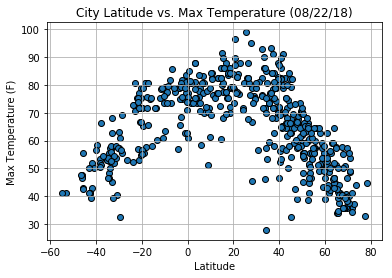

In [88]:
Max_temp_F = (city_data['Max Temp']*1.8+32)
plt.scatter(city_data['Lat'],Max_temp_F,edgecolors='k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (08/22/18)')
plt.savefig('City_Latitude_vs_Max_Temp.png')
plt.show()

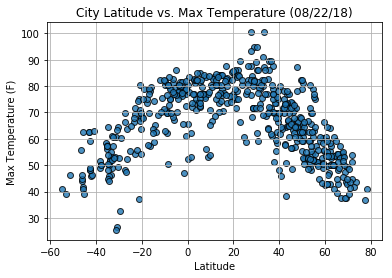

#### Latitude vs. Humidity Plot

Text(0.5,1,'City Latitude vs. Humidity (08/22/18)')

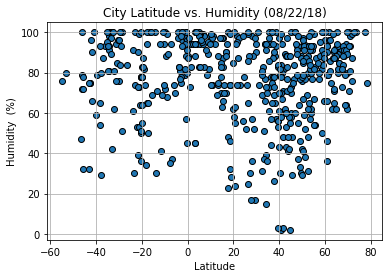

In [85]:

plt.scatter(city_data['Lat'],city_data['Humidity'],edgecolors='k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity  (%)')
plt.title('City Latitude vs. Humidity (08/22/18)')
plt.savefig('City_Latitude_vs_h.png')
plt.show()

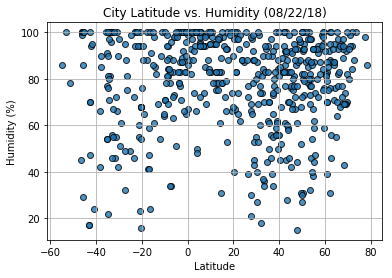

#### Latitude vs. Cloudiness Plot

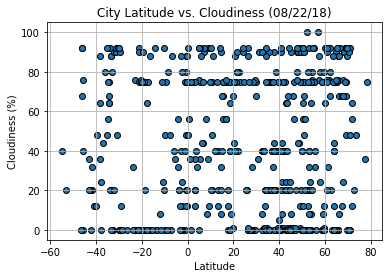

In [86]:

plt.scatter(city_data['Lat'],city_data['Cloudiness'],edgecolors='k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.savefig('City_Latitude_vs_Cloudiness.png')
plt.show()

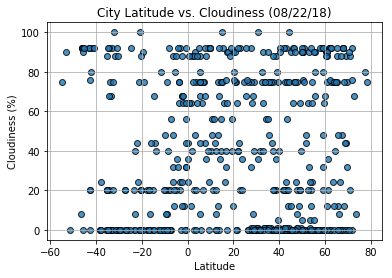

#### Latitude vs. Wind Speed Plot

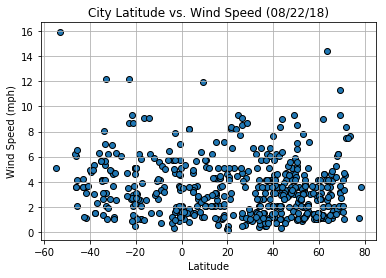

In [87]:

plt.scatter(city_data['Lat'],city_data['Wind Speed'],edgecolors='k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (08/22/18)')
plt.savefig('City_Latitude_vs_Wind_Speed.png')
plt.show()

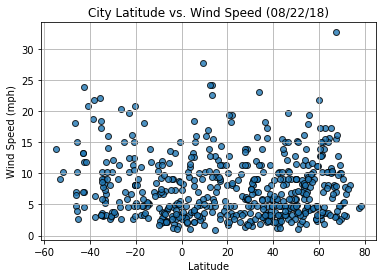